In [1890]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pandas.plotting import scatter_matrix

# Reading data

In [1570]:
#uploading your CSV file from the path in the device
data = pd.read_csv('../data/benin-malanville.csv')
data2 = pd.read_csv('../data/sierraleone-bumbuna.csv')
data3 = pd.read_csv('../data/togo-dapaong_qc.csv')

# Simple EDA workflow combining all the steps

In [1572]:
data.head() # checking wholeover data roughly

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [1573]:
data.shape

(525600, 19)

In [1574]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [1575]:
data.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.200000      28.800000       1.000000   
50%         4.300000      28.000000      55.100000       1.900000   
75%       447.900000      32.300000      80.100000       3.100000   
max      1342.300000      43.800000     100.000000      19.500000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        2.809195       0.473390     153.435172       8.582407   
std         2.029120       0.273395     102.332842       6.385864   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.400000      59.000000       3.700000   
50%         2.600000       0.500000     181.000000       8.600000   
75%         4.100000       0.600000     235.100000      12.300000   
max        26.600000       4.200000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      994.197199       0.000923       0.001905      35.246026   
std         2.474993       0.030363       0.037115      14.807258   
min       985.000000       0.000000       0.000000       9.000000   
25%       993.000000       0.000000       0.000000      24.200000   
50%       994.000000       0.000000       0.000000      30.000000   
75%       996.000000       0.000000       0.000000      46.900000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.471736       NaN  
std        12.348743       NaN  
min         8.100000       NaN  
25%        23.600000       NaN  
50%        28.900000       NaN  
75%        41.500000       NaN  
max        72.500000       NaN

In [1580]:
data.isnull().sum()


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [1583]:
data.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

# summmary statistics

In [1586]:
#Summary statistics are numerical values that summarize and provide an overview of a dataset's main characteristics. 

In [1588]:
numerical_data = data.select_dtypes(include=['int64', 'float64'])

In [1590]:
numerical_data

GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  WSstdev     WD  \
0      -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4      0.1  122.1   
1      -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0      0.0    0.0   
2      -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1      0.5  124.6   
3      -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7      0.4  120.3   
4      -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7      0.3  113.2   
...     ...  ...  ...   ...   ...   ...   ...  ...     ...      ...    ...   
525595 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1      0.5  119.3   
525596 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7      0.4  115.2   
525597 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1      0.5  129.8   
525598 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3      0.5  124.4   
525599 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6      0.3  124.1   

        WDstdev   BP  Cleaning  Precipitation  TModA  TModB  Comments  
0           0.0  998         0            0.0   26.3   26.2       NaN  
1           0.0  998         0            0.0   26.3   26.2       NaN  
2           1.5  997         0            0.0   26.4   26.2       NaN  
3           1.3  997         0            0.0   26.4   26.3       NaN  
4           1.0  997         0            0.0   26.4   26.3       NaN  
...         ...  ...       ...            ...    ...    ...       ...  
525595      4.1  996         0            0.0   23.5   22.9       NaN  
525596      2.3  996         0            0.0   23.5   22.9       NaN  
525597      3.4  996         0            0.0   23.5   22.9       NaN  
525598      4.3  996         0            0.0   23.5   22.9       NaN  
525599      5.9  996         0            0.0   23.5   22.9       NaN  

[525600 rows x 18 columns]

In [1592]:
numerical_data.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.200000      28.800000       1.000000   
50%         4.300000      28.000000      55.100000       1.900000   
75%       447.900000      32.300000      80.100000       3.100000   
max      1342.300000      43.800000     100.000000      19.500000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        2.809195       0.473390     153.435172       8.582407   
std         2.029120       0.273395     102.332842       6.385864   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.400000      59.000000       3.700000   
50%         2.600000       0.500000     181.000000       8.600000   
75%         4.100000       0.600000     235.100000      12.300000   
max        26.600000       4.200000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      994.197199       0.000923       0.001905      35.246026   
std         2.474993       0.030363       0.037115      14.807258   
min       985.000000       0.000000       0.000000       9.000000   
25%       993.000000       0.000000       0.000000      24.200000   
50%       994.000000       0.000000       0.000000      30.000000   
75%       996.000000       0.000000       0.000000      46.900000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.471736       NaN  
std        12.348743       NaN  
min         8.100000       NaN  
25%        23.600000       NaN  
50%        28.900000       NaN  
75%        41.500000       NaN  
max        72.500000       NaN

In [1593]:
mean_values = numerical_data.mean()
mean_values

GHI              240.559452
DNI              167.187516
DHI              115.358961
ModA             236.589496
ModB             228.883576
Tamb              28.179683
RH                54.487969
WS                 2.121113
WSgust             2.809195
WSstdev            0.473390
WD               153.435172
WDstdev            8.582407
BP               994.197199
Cleaning           0.000923
Precipitation      0.001905
TModA             35.246026
TModB             32.471736
Comments                NaN
dtype: float64

In [1596]:
median_values = numerical_data.median()
median_values

GHI                1.8
DNI               -0.1
DHI                1.6
ModA               4.5
ModB               4.3
Tamb              28.0
RH                55.1
WS                 1.9
WSgust             2.6
WSstdev            0.5
WD               181.0
WDstdev            8.6
BP               994.0
Cleaning           0.0
Precipitation      0.0
TModA             30.0
TModB             28.9
Comments           NaN
dtype: float64

In [1598]:
std_values = numerical_data.std()
std_values

GHI              331.131327
DNI              261.710501
DHI              158.691074
ModA             326.894859
ModB             316.536515
Tamb               5.924297
RH                28.073069
WS                 1.603466
WSgust             2.029120
WSstdev            0.273395
WD               102.332842
WDstdev            6.385864
BP                 2.474993
Cleaning           0.030363
Precipitation      0.037115
TModA             14.807258
TModB             12.348743
Comments                NaN
dtype: float64

In [1600]:
var_values = numerical_data.var()
var_values


GHI              109647.955903
DNI               68492.386135
DHI               25182.856923
ModA             106860.248523
ModB             100195.365569
Tamb                 35.097295
RH                  788.097191
WS                    2.571103
WSgust                4.117327
WSstdev               0.074745
WD                10472.010561
WDstdev              40.779260
BP                    6.125591
Cleaning              0.000922
Precipitation         0.001378
TModA               219.254876
TModB               152.491463
Comments                   NaN
dtype: float64

In [1602]:
min_values = numerical_data.min()
min_values

GHI              -12.9
DNI               -7.8
DHI              -12.6
ModA               0.0
ModB               0.0
Tamb              11.0
RH                 2.1
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP               985.0
Cleaning           0.0
Precipitation      0.0
TModA              9.0
TModB              8.1
Comments           NaN
dtype: float64

In [1604]:
max_values = numerical_data.max()
max_values

GHI              1413.0
DNI               952.3
DHI               759.2
ModA             1342.3
ModB             1342.3
Tamb               43.8
RH                100.0
WS                 19.5
WSgust             26.6
WSstdev             4.2
WD                360.0
WDstdev            99.4
BP               1003.0
Cleaning            1.0
Precipitation       2.5
TModA              81.0
TModB              72.5
Comments            NaN
dtype: float64

In [1606]:
range_values = numerical_data.max() - numerical_data.min()
range_values

GHI              1425.9
DNI               960.1
DHI               771.8
ModA             1342.3
ModB             1342.3
Tamb               32.8
RH                 97.9
WS                 19.5
WSgust             26.6
WSstdev             4.2
WD                360.0
WDstdev            99.4
BP                 18.0
Cleaning            1.0
Precipitation       2.5
TModA              72.0
TModB              64.4
Comments            NaN
dtype: float64

In [1608]:
skewness_values = numerical_data.skew()
skewness_values

GHI               1.028446
DNI               1.290260
DHI               1.210406
ModA              1.067416
ModB              1.076031
Tamb              0.000512
RH               -0.026653
WS                0.868406
WSgust            0.928908
WSstdev           0.695449
WD               -0.084974
WDstdev           1.070081
BP               -0.263995
Cleaning         32.874282
Precipitation    34.620445
TModA             0.677442
TModB             0.616822
Comments               NaN
dtype: float64

In [1610]:
kurtosis_values = numerical_data.kurt()
kurtosis_values

GHI                -0.460184
DNI                 0.172956
DHI                 0.498993
ModA               -0.387674
ModB               -0.351332
Tamb               -0.444624
RH                 -1.298555
WS                  1.579008
WSgust              1.942468
WSstdev             3.348514
WD                 -1.255899
WDstdev             4.654392
BP                 -0.063902
Cleaning         1078.722537
Precipitation    1518.289300
TModA              -0.581054
TModB              -0.443101
Comments                 NaN
dtype: float64

In [1612]:
summary = numerical_data.describe()
summary

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.200000      28.800000       1.000000   
50%         4.300000      28.000000      55.100000       1.900000   
75%       447.900000      32.300000      80.100000       3.100000   
max      1342.300000      43.800000     100.000000      19.500000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        2.809195       0.473390     153.435172       8.582407   
std         2.029120       0.273395     102.332842       6.385864   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.400000      59.000000       3.700000   
50%         2.600000       0.500000     181.000000       8.600000   
75%         4.100000       0.600000     235.100000      12.300000   
max        26.600000       4.200000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      994.197199       0.000923       0.001905      35.246026   
std         2.474993       0.030363       0.037115      14.807258   
min       985.000000       0.000000       0.000000       9.000000   
25%       993.000000       0.000000       0.000000      24.200000   
50%       994.000000       0.000000       0.000000      30.000000   
75%       996.000000       0.000000       0.000000      46.900000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.471736       NaN  
std        12.348743       NaN  
min         8.100000       NaN  
25%        23.600000       NaN  
50%        28.900000       NaN  
75%        41.500000       NaN  
max        72.500000       NaN

# data quality check

In [1615]:
#missing value

In [1617]:
missing_values = data.isnull().sum()
missing_values

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [1619]:
missing_percentage = data.isnull().mean() * 100
missing_percentage

Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64

In [1621]:
#removing columns with null values

In [1623]:
data = data.drop(columns=['Comments'])

In [1625]:
data

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0           0.1  122.1      0.0  998         0            0.0   26.3   26.2  
1           0.0    0.0      0.0  998         0            0.0   26.3   26.2  
2           0.5  124.6      1.5  997         0            0.0   26.4   26.2  
3           0.4  120.3      1.3  997         0            0.0   26.4   26.3  
4           0.3  113.2      1.0  997         0            0.0   26.4   26.3  
...         ...    ...      ...  ...       ...            ...    ...    ...  
525595      0.5  119.3      4.1  996         0            0.0   23.5   22.9  
525596      0.4  115.2      2.3  996         0            0.0   23.5   22.9  
525597      0.5  129.8      3.4  996         0            0.0   23.5   22.9  
525598      0.5  124.4      4.3  996         0            0.0   23.5   22.9  
525599      0.3  124.1      5.9  996         0            0.0   23.5   22.9  

[525600 rows x 18 columns]

In [1627]:
#duplicates

In [1629]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB]
Index: []

In [1631]:
#Data Type Validation

In [1633]:
data.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
dtype: object

In [1635]:
#converting object data type to the correct format.

In [1637]:
print(data['Timestamp'].head(10))  # Show the first 10 values

0    2021-08-09 00:01
1    2021-08-09 00:02
2    2021-08-09 00:03
3    2021-08-09 00:04
4    2021-08-09 00:05
5    2021-08-09 00:06
6    2021-08-09 00:07
7    2021-08-09 00:08
8    2021-08-09 00:09
9    2021-08-09 00:10
Name: Timestamp, dtype: object


In [1639]:
print(data['Timestamp'].unique())  # Show unique values to spot any anomalies


['2021-08-09 00:01' '2021-08-09 00:02' '2021-08-09 00:03' ...
 '2022-08-08 23:58' '2022-08-08 23:59' '2022-08-09 00:00']


In [1641]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y-%m-%d %H:%M', errors='coerce')


In [1643]:
data

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
0      2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0   
1      2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0   
2      2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3   
3      2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2   
4      2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1   
...                    ...  ...  ...  ...   ...   ...   ...   ...  ...   
525595 2022-08-08 23:56:00 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3   
525596 2022-08-08 23:57:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2   
525597 2022-08-08 23:58:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6   
525598 2022-08-08 23:59:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9   
525599 2022-08-09 00:00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2   

        WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
0          0.4      0.1  122.1      0.0  998         0            0.0   26.3   
1          0.0      0.0    0.0      0.0  998         0            0.0   26.3   
2          1.1      0.5  124.6      1.5  997         0            0.0   26.4   
3          0.7      0.4  120.3      1.3  997         0            0.0   26.4   
4          0.7      0.3  113.2      1.0  997         0            0.0   26.4   
...        ...      ...    ...      ...  ...       ...            ...    ...   
525595     1.1      0.5  119.3      4.1  996         0            0.0   23.5   
525596     0.7      0.4  115.2      2.3  996         0            0.0   23.5   
525597     1.1      0.5  129.8      3.4  996         0            0.0   23.5   
525598     1.3      0.5  124.4      4.3  996         0            0.0   23.5   
525599     1.6      0.3  124.1      5.9  996         0            0.0   23.5   

        TModB  
0        26.2  
1        26.2  
2        26.2  
3        26.3  
4        26.3  
...       ...  
525595   22.9  
525596   22.9  
525597   22.9  
525598   22.9  
525599   22.9  

[525600 rows x 18 columns]

In [1661]:
# absolute transform
data['GHI'] = data['GHI'].abs()

In [1663]:
data['DNI'] = data['DNI'].abs()

In [1665]:
data['DHI'] = data['DHI'].abs()

In [1647]:
data

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
0      2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0   
1      2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0   
2      2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3   
3      2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2   
4      2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1   
...                    ...  ...  ...  ...   ...   ...   ...   ...  ...   
525595 2022-08-08 23:56:00 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3   
525596 2022-08-08 23:57:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2   
525597 2022-08-08 23:58:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6   
525598 2022-08-08 23:59:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9   
525599 2022-08-09 00:00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2   

        WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
0          0.4      0.1  122.1      0.0  998         0            0.0   26.3   
1          0.0      0.0    0.0      0.0  998         0            0.0   26.3   
2          1.1      0.5  124.6      1.5  997         0            0.0   26.4   
3          0.7      0.4  120.3      1.3  997         0            0.0   26.4   
4          0.7      0.3  113.2      1.0  997         0            0.0   26.4   
...        ...      ...    ...      ...  ...       ...            ...    ...   
525595     1.1      0.5  119.3      4.1  996         0            0.0   23.5   
525596     0.7      0.4  115.2      2.3  996         0            0.0   23.5   
525597     1.1      0.5  129.8      3.4  996         0            0.0   23.5   
525598     1.3      0.5  124.4      4.3  996         0            0.0   23.5   
525599     1.6      0.3  124.1      5.9  996         0            0.0   23.5   

        TModB  
0        26.2  
1        26.2  
2        26.2  
3        26.3  
4        26.3  
...       ...  
525595   22.9  
525596   22.9  
525597   22.9  
525598   22.9  
525599   22.9  

[525600 rows x 18 columns]

In [1012]:
# check for outliers for columns (ModA, ModB) and wind speed data (WS, WSgust) using scatter plot.

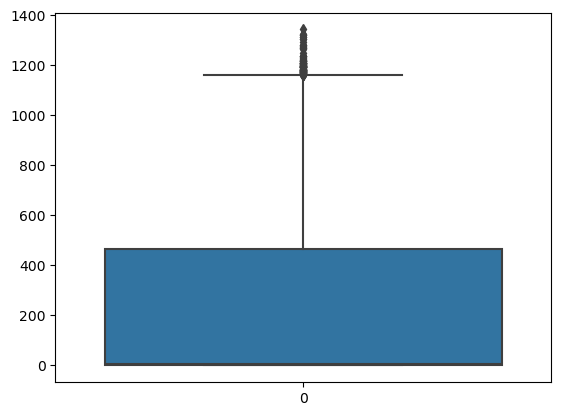

In [1014]:
sns.boxplot(data['ModA'])
plt.show()

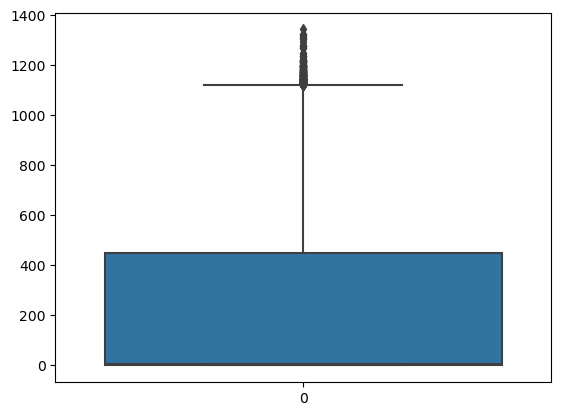

In [1016]:
sns.boxplot(data['ModB'])
plt.show()

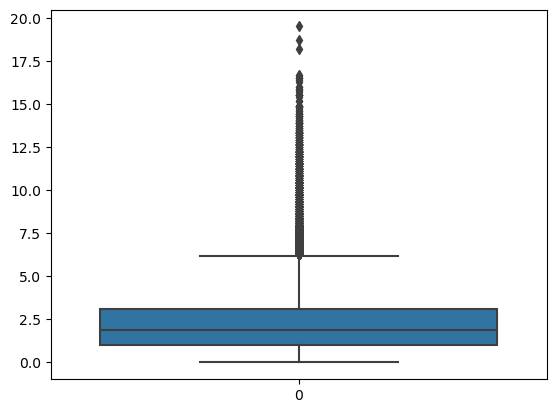

In [1018]:
sns.boxplot(data['WS'])
plt.show()

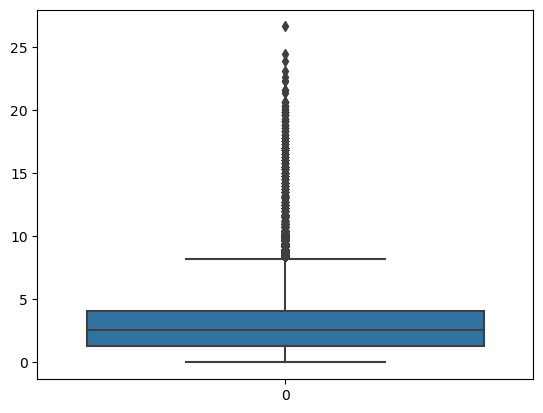

In [1019]:
sns.boxplot(data['WSgust'])
plt.show()

# Time Series Analysis

In [ ]:
#to observe different variables over time:

In [1817]:
data.set_index('Timestamp', inplace=True)

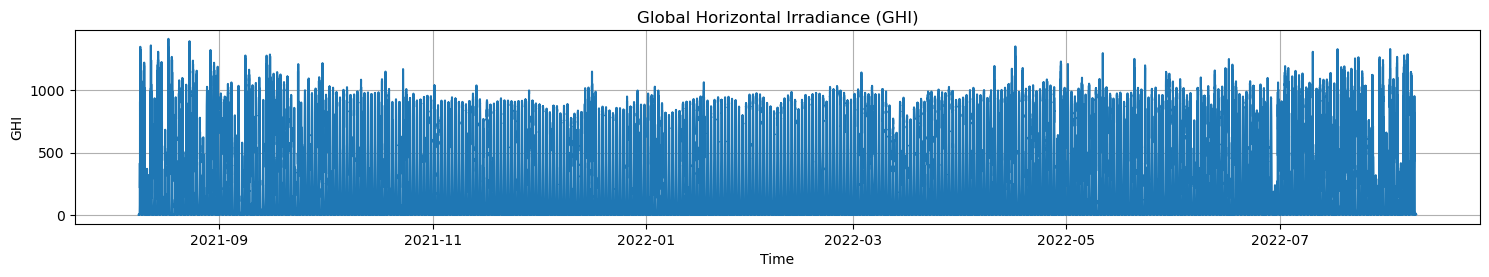

In [1845]:
plt.figure(figsize=(15, 10))

# Plot GHI
plt.subplot(4, 1, 1)
plt.plot(data.index, data['GHI'], label='GHI')
plt.title('Global Horizontal Irradiance (GHI)')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.grid(True)
plt.tight_layout()
plt.show()

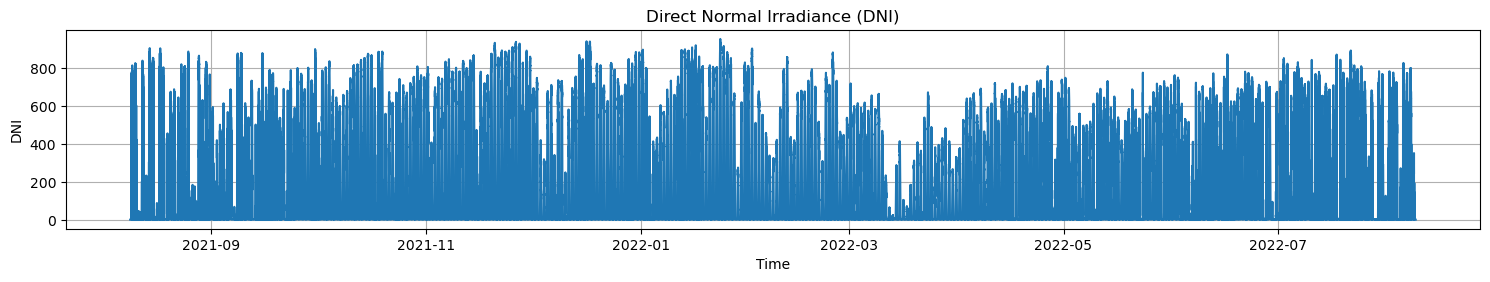

In [1843]:
# Plot DNI
plt.figure(figsize=(15, 10))
plt.subplot(4, 1, 2)
plt.plot(data.index, data['DNI'], label='DNI')
plt.title('Direct Normal Irradiance (DNI)')
plt.xlabel('Time')
plt.ylabel('DNI')
plt.grid(True)
plt.tight_layout()
plt.show()

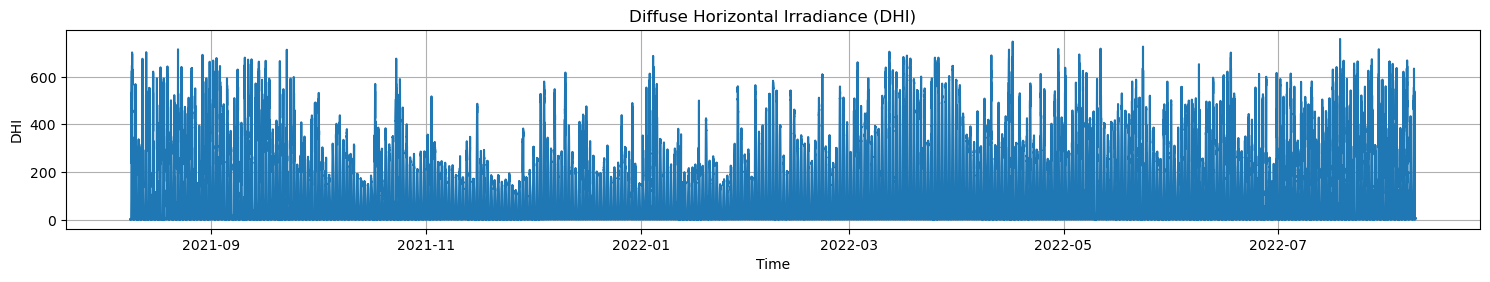

In [1841]:
# Plot DHI
plt.figure(figsize=(15, 10))
plt.subplot(4, 1, 3)
plt.plot(data.index, data['DHI'], label='DHI')
plt.title('Diffuse Horizontal Irradiance (DHI)')
plt.xlabel('Time')
plt.ylabel('DHI')
plt.grid(True)
plt.tight_layout()
plt.show()


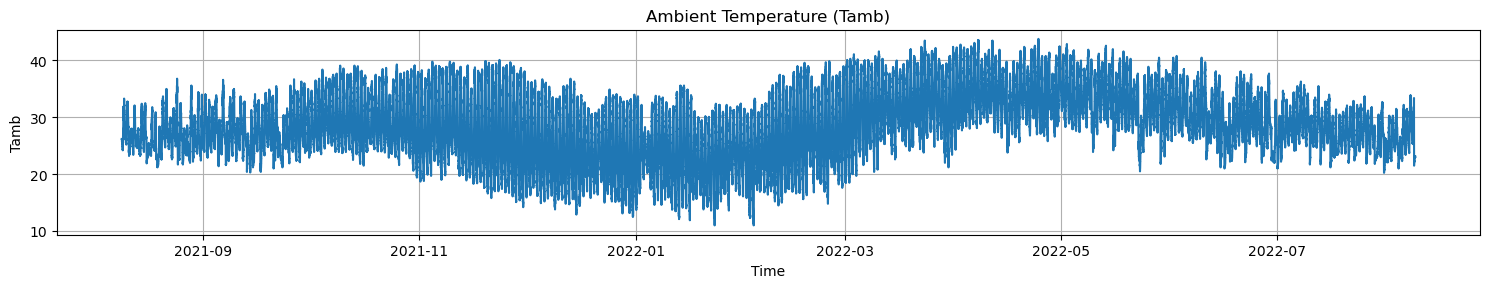

In [1839]:
# Plot Tamb
plt.figure(figsize=(15, 10))
plt.subplot(4, 1, 4)
plt.plot(data.index, data['Tamb'], label='Tamb')
plt.title('Ambient Temperature (Tamb)')
plt.xlabel('Time')
plt.ylabel('Tamb')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Analyzing Patterns

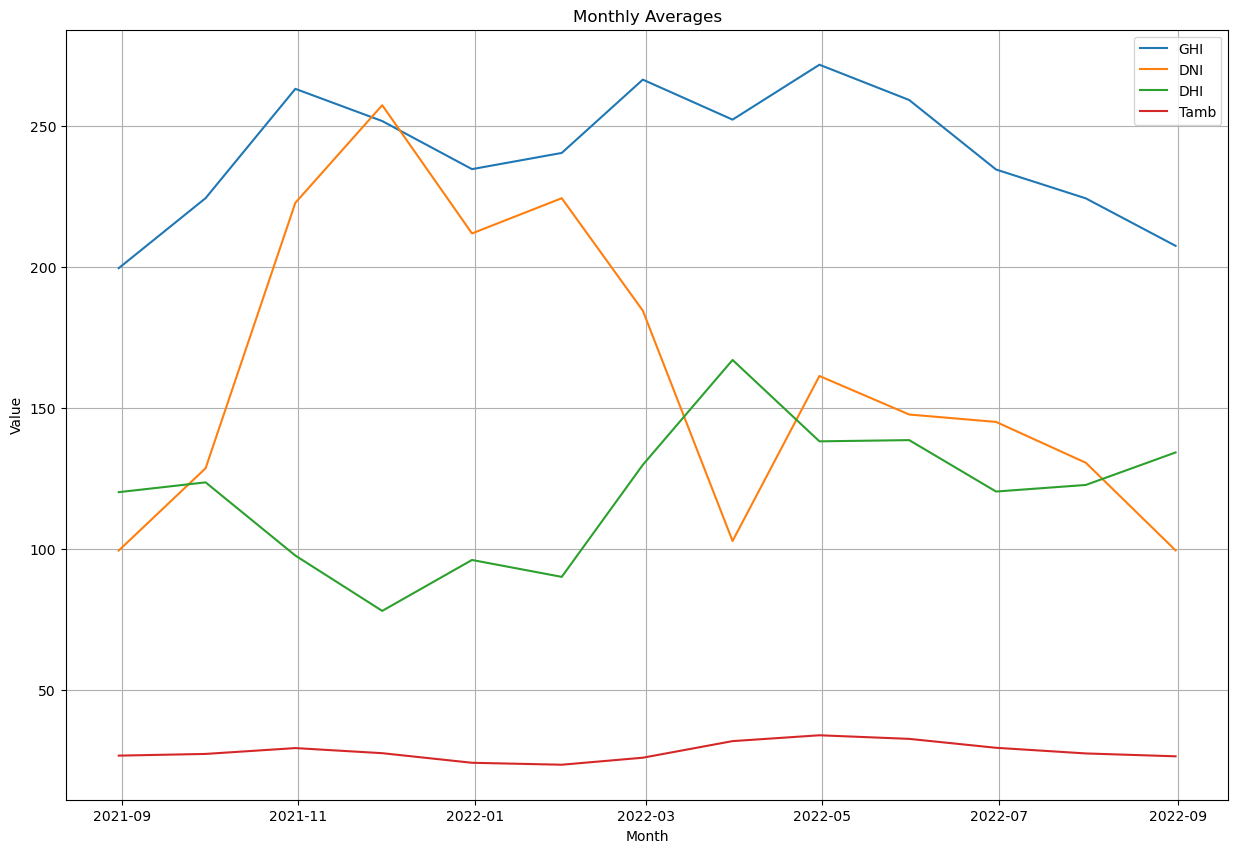

In [1847]:
monthly_data = data.resample('M').mean()
plt.figure(figsize=(15, 10))
plt.plot(monthly_data.index, monthly_data['GHI'], label='GHI')
plt.plot(monthly_data.index, monthly_data['DNI'], label='DNI')
plt.plot(monthly_data.index, monthly_data['DHI'], label='DHI')
plt.plot(monthly_data.index, monthly_data['Tamb'], label='Tamb')
plt.title('Monthly Averages')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#trends throughout the day but need to need to extract time components

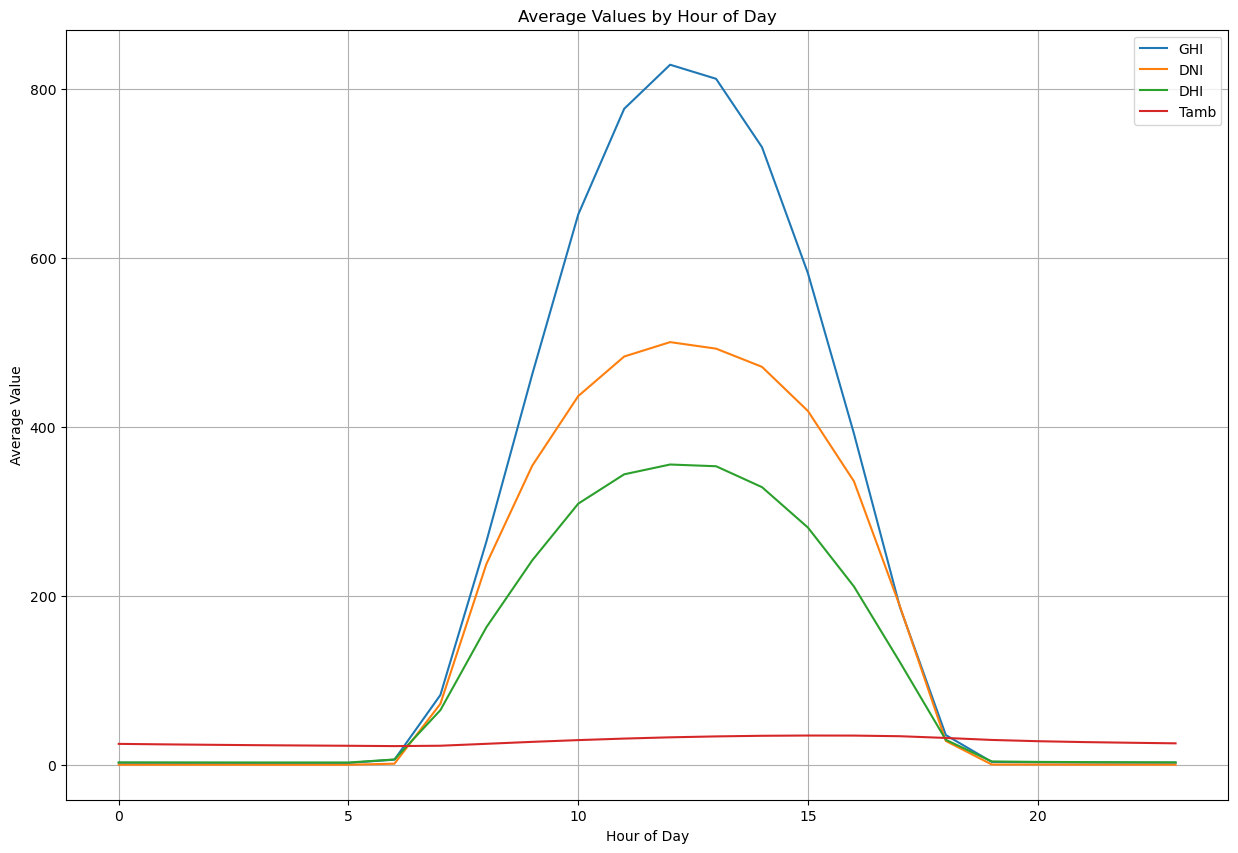

In [1862]:
data['hour'] = data.index.hour
daily_data = data.groupby('hour').mean()
plt.figure(figsize=(15, 10))
plt.plot(daily_data.index, daily_data['GHI'], label='GHI')
plt.plot(daily_data.index, daily_data['DNI'], label='DNI')
plt.plot(daily_data.index, daily_data['DHI'], label='DHI')
plt.plot(daily_data.index, daily_data['Tamb'], label='Tamb')
plt.title('Average Values by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Anomalies:-look for peaks and valleys in the plots to identify anomalies.these could be times when values are unusually high or low.

In [1851]:
#Evaluate the impact of cleaning (using the 'Cleaning' column) on the sensor readings (ModA, ModB) over time.

# Correlation Analysis

In [1872]:
columns_of_interest = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']
data_subset = data[columns_of_interest]

In [1876]:
corr_matrix = data_subset.corr() #correlation matrix

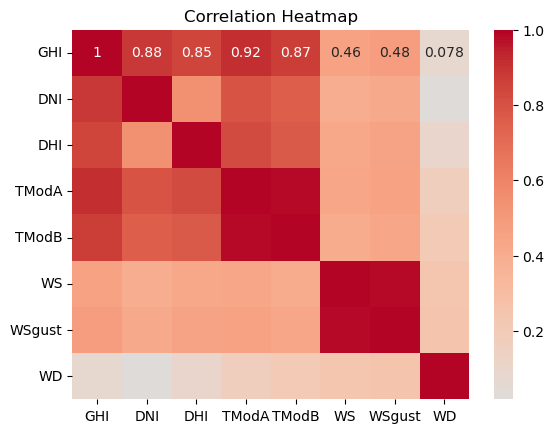

In [1888]:
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

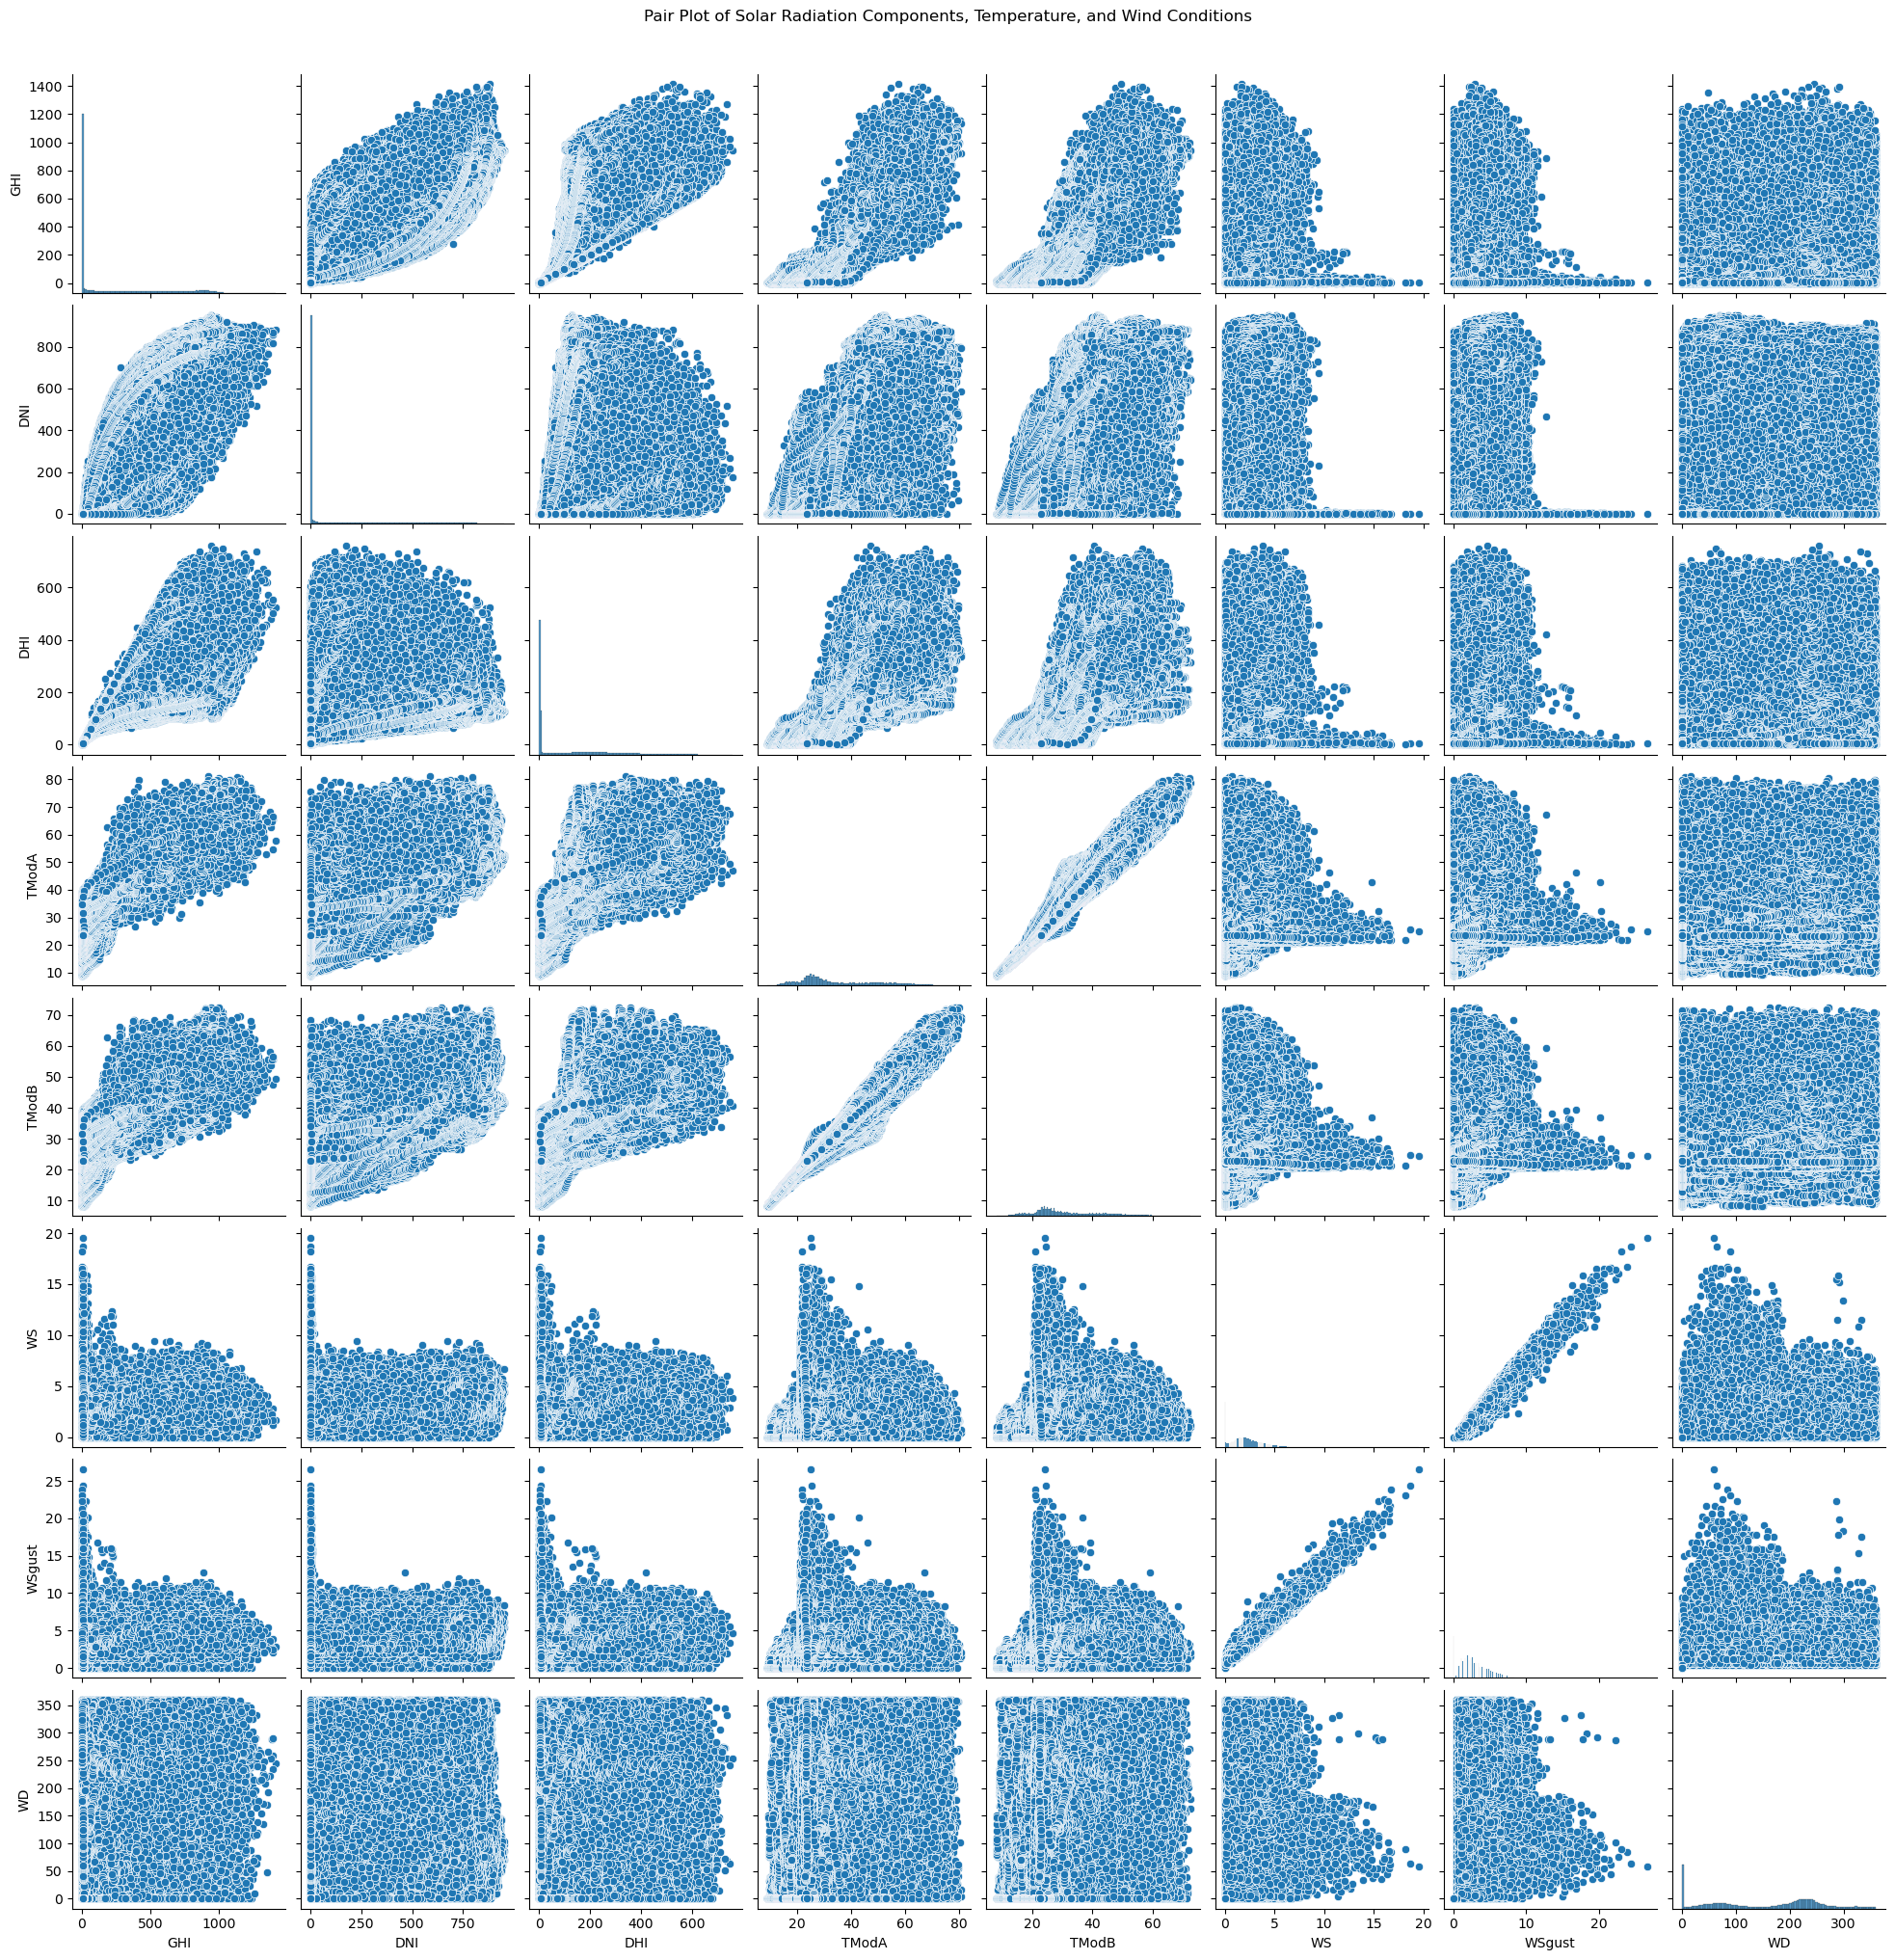

In [1882]:
#pairplot
sns.pairplot(data_subset)
plt.suptitle('Pair Plot of Solar Radiation Components, Temperature, and Wind Conditions', y=1.02)
plt.show()

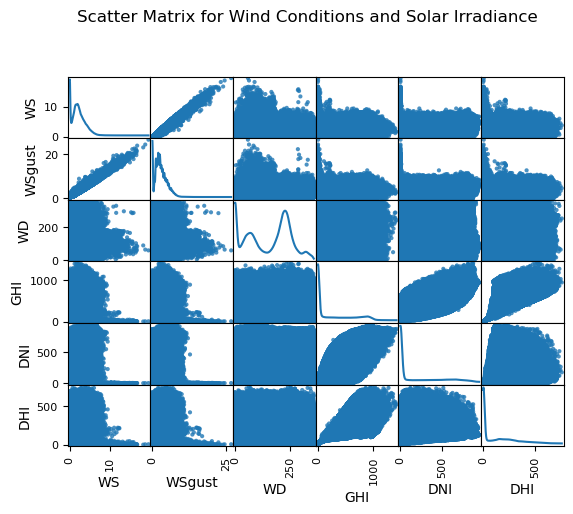

In [1933]:
#scatter matrix
scatter_matrix(data[['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI']], alpha=0.8, diagonal='kde')
plt.suptitle('Scatter Matrix for Wind Conditions and Solar Irradiance', y=1.02)
plt.show()

# Wind Analysis

NameError: name 'WD' is not defined

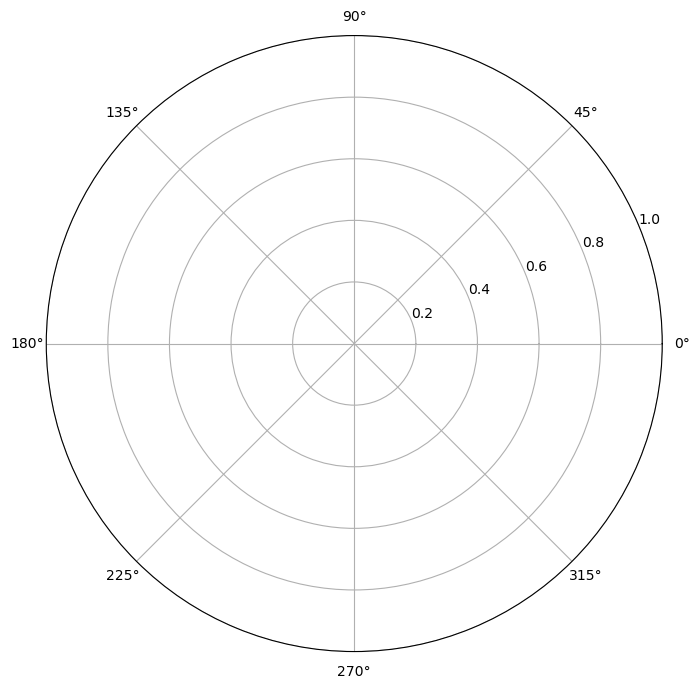

In [1931]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Convert wind directions from degrees to radians
theta = np.deg2rad(WD)


In [ ]:
# Plot wind speed
ax.scatter(theta, wind_speeds, c=wind_speeds, cmap='viridis', alpha=0.75, edgecolors='w')

In [ ]:
# Add color bar
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical')
cbar.set_label('Wind Speed')

In [ ]:
# Set the labels
ax.set_xlabel('Wind Direction')
ax.set_ylabel('Wind Speed')
ax.set_title('Wind Speed and Direction Polar Plot')
# Show the plot
plt.show()

In [ ]:
data